## Sentiment of popular Twitter users
This notebook is a steb-by-step tutorial showing the sentiments of popular twitter users in the Tweetplomacy-23 discourse. 
## Target Audience

This tutorial is aimed at a basic level. You should have basic knowledge of Pandas and Python programming.

## Duration

About one hour.

## Environment Setup

Run the cells below:

In [1]:
import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.display.float_format = '{:.4f}'.format


from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea, VPacker)
from matplotlib.ticker import LogLocator, LogFormatter, LogFormatterSciNotation

from PIL import Image, ImageOps, ImageDraw

## Read the Data

In [2]:
df = pd.read_pickle("joint_tweetplomacy_23_unique_tweets_with_freshest_retweet_metadata.pkl")

In [3]:
most_followed_user = df.loc[df.groupby(['hashedUserName'])['followers'].idxmax()][['userName','hashedUserName', 'matchingUserName', 'followers']].sort_values('followers', ascending=False)

In [4]:
no_dupicates_mostfollowed_users = most_followed_user.drop_duplicates(subset=["hashedUserName"])
no_dupicates_mostfollowed_users

,userName,hashedUserName,matchingUserName,followers
1128070,{'hashed': 'c1d4d177b4028f2b6ea90a3617c32fb6'},c1d4d177b4028f2b6ea90a3617c32fb6,NaN,133460751
1060914,{'hashed': '22eab4afd9d75b89db26ab33ad7fa192'},22eab4afd9d75b89db26ab33ad7fa192,NaN,130658124
381050,{'hashed': '0b64e075d55e5221457d3e22ba3dcc14'},0b64e075d55e5221457d3e22ba3dcc14,NaN,112404202
831893,{'hashed': '7cd534d396546a50ddd2dea9ee7f9145'},7cd534d396546a50ddd2dea9ee7f9145,NaN,108790420
532715,"{'userName': 'realDonaldTrump', 'hashed': '752...",75224fc65ae453fe9ec3ca855cd8619b,realDonaldTrump,88957640
...,...,...,...,...
260865,{'hashed': 'df86b63f6f5957b98e30824b6bb17356'},df86b63f6f5957b98e30824b6bb17356,NaN,0
1791610,{'hashed': '99e0e7183d59458d6070a6f1d4b1d7a0'},99e0e7183d59458d6070a6f1d4b1d7a0,NaN,0
210858,{'hashed': 'ca839ce615e4a1adaa2d71fe3c02d40c'},ca839ce615e4a1adaa2d71fe3c02d40c,NaN,0
1087552,{'hashed': '8055c6e8a58164e9f336c26bb48ef274'},8055c6e8a58164e9f336c26bb48ef274,NaN,0


In [5]:
mean_sentiment_per_user = df.groupby(['hashedUserName'])['sentimentCompound'].mean().reset_index()

In [6]:
mean_sentiment_per_user

,hashedUserName,sentimentCompound
0,00001595fc67eec756fdd916b684a3a4,nan
1,00001efe6e68199dbf24cf2dbdaa0a54,0.0018
2,0000237796ee065a1ed064ffa51d03f9,-0.4767
3,00004adbc4cc463cee7a5e68621f6b78,nan
4,0000584f4d1843f803d422eb12401e48,0.7650
...,...,...
914528,ffff782c8653d92ecc723fc8cf3586cf,0.0571
914529,ffff9508f47d16441f8f47e76989e36a,-0.7541
914530,ffffa81367bbd0ab7f79900b35361014,-0.6378
914531,fffff1f6d33aac65618d12e943622160,nan


In [7]:
sentiment_of_most_followed_user = pd.merge(no_dupicates_mostfollowed_users, mean_sentiment_per_user, on='hashedUserName', how='inner')


In [8]:
sentiment_of_most_followed_know_users = sentiment_of_most_followed_user[sentiment_of_most_followed_user['matchingUserName'].notnull()] 

In [9]:
sentiment_of_most_followed_user['hashedUserName']

0         c1d4d177b4028f2b6ea90a3617c32fb6
1         22eab4afd9d75b89db26ab33ad7fa192
2         0b64e075d55e5221457d3e22ba3dcc14
3         7cd534d396546a50ddd2dea9ee7f9145
4         75224fc65ae453fe9ec3ca855cd8619b
                        ...               
914528    df86b63f6f5957b98e30824b6bb17356
914529    99e0e7183d59458d6070a6f1d4b1d7a0
914530    ca839ce615e4a1adaa2d71fe3c02d40c
914531    8055c6e8a58164e9f336c26bb48ef274
914532    ecec666d07d6f69ccf14764d322100dd
Name: hashedUserName, Length: 914533, dtype: object

In [10]:
covid_top_followed_user = df[df['hashedUserName'].isin(sentiment_of_most_followed_know_users['hashedUserName']) & df['topic_covid_19']==True].groupby('hashedUserName').count()['topic_covid_19'].reset_index()

In [11]:
energy_top_followed_user = df[df['hashedUserName'].isin(sentiment_of_most_followed_know_users['hashedUserName']) & df['topic_energy_security']==True].groupby('hashedUserName').count()['topic_energy_security'].reset_index()

In [12]:
climate_top_followed_user = df[df['hashedUserName'].isin(sentiment_of_most_followed_know_users['hashedUserName']) & df['topic_climate_change']==True].groupby('hashedUserName').count()['topic_climate_change'].reset_index()

In [13]:
topic_of_most_followed_user = pd.merge(covid_top_followed_user, energy_top_followed_user, on='hashedUserName', how='outer')
topic_of_most_followed_user = pd.merge(topic_of_most_followed_user, climate_top_followed_user, on='hashedUserName', how='outer')
topic_of_most_followed_user

,hashedUserName,topic_covid_19,topic_energy_security,topic_climate_change
0,005bc659afb497a0db74028d8bb827ce,219.0000,55.0000,7.0000
1,03a618d0de2a5e21a9df188f877649e5,104.0000,93.0000,10.0000
2,03a9150edb278db36f4343a689e2eac0,11.0000,1.0000,nan
3,0433a030f35fe613ec8cf50417323dea,1765.0000,615.0000,1647.0000
4,0471ec2cebed8299af45e96773f2e6a5,82.0000,186.0000,8.0000
...,...,...,...,...
543,402b8d4c8b4613802952141e33478800,nan,nan,1.0000
544,87a371191aedaa1d6958efdce05080dd,nan,nan,4.0000
545,934f0ee95316d2c68562b2b73d8d71bf,nan,nan,2.0000
546,d29559fc15623022d99520cb1c2b449a,nan,nan,1.0000


In [14]:
topic_of_most_followed_user['topic'] = topic_of_most_followed_user[['topic_covid_19', 'topic_energy_security', 'topic_climate_change']].idxmax(axis=1)

In [15]:
topic_of_most_followed_user

,hashedUserName,topic_covid_19,topic_energy_security,topic_climate_change,topic
0,005bc659afb497a0db74028d8bb827ce,219.0000,55.0000,7.0000,topic_covid_19
1,03a618d0de2a5e21a9df188f877649e5,104.0000,93.0000,10.0000,topic_covid_19
2,03a9150edb278db36f4343a689e2eac0,11.0000,1.0000,nan,topic_covid_19
3,0433a030f35fe613ec8cf50417323dea,1765.0000,615.0000,1647.0000,topic_covid_19
4,0471ec2cebed8299af45e96773f2e6a5,82.0000,186.0000,8.0000,topic_energy_security
...,...,...,...,...,...
543,402b8d4c8b4613802952141e33478800,nan,nan,1.0000,topic_climate_change
544,87a371191aedaa1d6958efdce05080dd,nan,nan,4.0000,topic_climate_change
545,934f0ee95316d2c68562b2b73d8d71bf,nan,nan,2.0000,topic_climate_change
546,d29559fc15623022d99520cb1c2b449a,nan,nan,1.0000,topic_climate_change


In [16]:

sentiment_of_most_followed_user = pd.merge(sentiment_of_most_followed_know_users, topic_of_most_followed_user[['hashedUserName','topic']], on='hashedUserName', how='inner')
sentiment_of_most_followed_user

,userName,hashedUserName,matchingUserName,followers,sentimentCompound,topic
0,"{'userName': 'realDonaldTrump', 'hashed': '752...",75224fc65ae453fe9ec3ca855cd8619b,realDonaldTrump,88957640,0.1466,topic_energy_security
1,"{'userName': 'narendramodi', 'hashed': 'c45c37...",c45c37cfa8e3bd7e2f111f098986603d,narendramodi,88896223,0.5329,topic_covid_19
2,"{'userName': 'PMOIndia', 'hashed': '392cd458ed...",392cd458ed4ddd081ed3a83dd5798df3,PMOIndia,53169301,0.2983,topic_covid_19
3,"{'userName': 'JoeBiden', 'hashed': 'a9da346cff...",a9da346cffc93d6215f6c75d6fabbc89,JoeBiden,37233396,0.0444,topic_covid_19
4,"{'userName': 'POTUS', 'hashed': '801f9d023676c...",801f9d023676c53e8f23101aaa5fc3bc,POTUS,31034663,0.2811,topic_covid_19
...,...,...,...,...,...,...
543,"{'userName': 'LucFrieden', 'hashed': '26a042d5...",26a042d5e1472394c6a0c01fbe3fffeb,LucFrieden,1345,0.6597,topic_covid_19
544,"{'userName': 'Lemskwape', 'hashed': 'b019480aa...",b019480aa7aa0a48a8de6c42f511891a,Lemskwape,1005,0.0000,topic_covid_19
545,"{'userName': 'ghanagov', 'hashed': '85db7ce4a2...",85db7ce4a215ad6ac97bd0c9f459ee9d,ghanagov,886,-0.1273,topic_covid_19
546,"{'userName': 'Presidencia_Bol', 'hashed': 'bbd...",bbd5db3aa11392feafce113958a02761,Presidencia_Bol,472,nan,topic_covid_19


## Plot Sentiments of Most Followed Users

In [17]:
# Create a circular version of the image
def make_circle(img_path, size=(64, 64)):
    with Image.open(img_path).convert("RGBA") as im:
        im = im.resize(size, Image.LANCZOS)
        mask = Image.new('L', im.size, 0)
        draw = ImageDraw.Draw(mask)
        draw.ellipse((0, 0, size[0], size[1]), fill=255)
        im.putalpha(mask)
        return np.asarray(im)

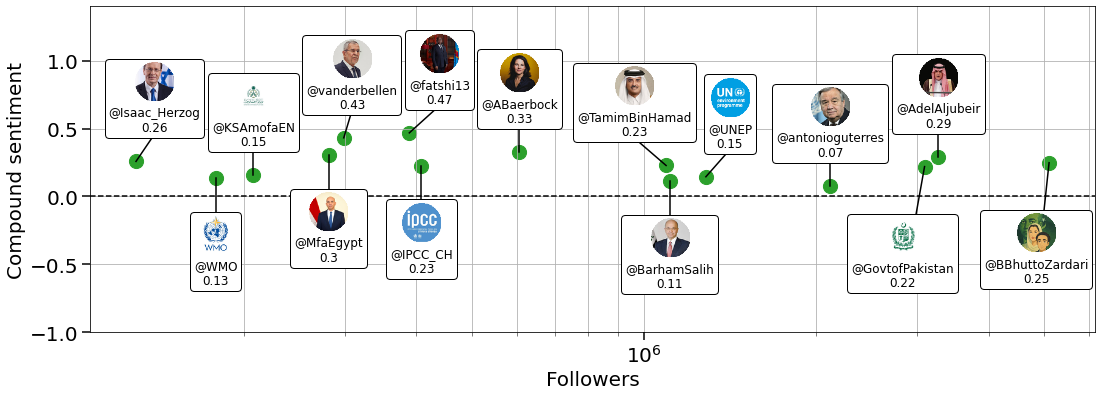

In [21]:
# Setup figure
fig, ax = plt.subplots(figsize=(18, 6))
topic = 'topic_climate_change'
top_users_for_topic = sentiment_of_most_followed_user[(sentiment_of_most_followed_user['topic'] == topic)
                                                      & (sentiment_of_most_followed_user['sentimentCompound'].notnull())
                                                     ].head(15)
#print(top_users_for_topic)
# Plot blue dots
ax.scatter(
    top_users_for_topic['followers'],
    top_users_for_topic['sentimentCompound'],
    color='tab:green',
    s=200,
    zorder=1
)

# Add image+text annotations with bounding box and connecting line
for idx, row in top_users_for_topic.iterrows():
    x, y = row['followers'], row['sentimentCompound']
   

    img_path = './user-profiles-pics/' + row['matchingUserName'] + '.jpg'
    if pd.notna(img_path) and os.path.exists(img_path):
        circ_img_array = make_circle(img_path)
        imagebox = OffsetImage(circ_img_array, zoom=0.6)

        text = TextArea(
            f"@{row['matchingUserName']}\n{round(row['sentimentCompound'], 2)}",
            textprops=dict(fontsize=12, ha='center')
        )

        # Combine image and text vertically
        box = VPacker(children=[imagebox, text], align="center", pad=0, sep=5)

        if row['matchingUserName'] in ['BarhamSalih', 'IPCC_CH', 'WMO', 'MfaEgypt']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'UNEP']:#
            x_offset = 130000  # space above the dot
            x_annot = x + x_offset
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['TamimBinHamad']:
            x_offset = 130000  # space above the dot
            x_annot = x - x_offset
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [  'fatshi13']:#'ABaerbock',
            x_offset = 50000  # space above the dot
            x_annot = x + x_offset
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'Isaac_Herzog', 'vanderbellen']:
            x_offset = 10000  # space above the dot
            x_annot = x + x_offset
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['GovtofPakistan', 'BBhuttoZardari']:
            x_offset = 260000  # space above the dot
            x_annot = x - x_offset
            y_offset = 0.9  # space above the dot
            y_annot = y - y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        else:
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
    else:
        print( row['matchingUserName'] )

# Axis and plot formatting
ax.set_xlabel('Followers', fontsize=20)
ax.set_ylabel('Compound sentiment', fontsize=20)
ax.set_ylim([-1, 1.4])  # extend to fit annotations
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_xscale('log')


#ax.set_title('Top 15 Most Followed Users on Climate Change', fontsize=20, pad=10)

# Minor ticks and labels on log-scale x-axis
minor_locator = LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100)
#minor_formatter = LogFormatter(labelOnlyBase=True)

ax.xaxis.set_minor_locator(minor_locator)
#ax.xaxis.set_minor_formatter(minor_formatter)
minor_formatter = LogFormatterSciNotation(labelOnlyBase=False)
# Format minor tick labels on the y-axis
ax.xaxis.set_minor_formatter(minor_formatter)

ax.xaxis.grid(True, which='minor')
# Optional: style the ticks
ax.tick_params(axis='x', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='x', which='major', length=8, width=1.5, labelsize=20)

ax.tick_params(axis='y', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='y', which='major', length=8, width=1.5, labelsize=20)

ax.xaxis.grid(True, which='minor')



plt.axhline(0, color='black', linestyle='dashed')
plt.xticks(fontsize=20, ha='center')
plt.yticks(fontsize=20, ha='right')
plt.grid(True)

plt.savefig('./plots/followersvssentiments_climate_change.pdf', bbox_inches = 'tight')
plt.show()


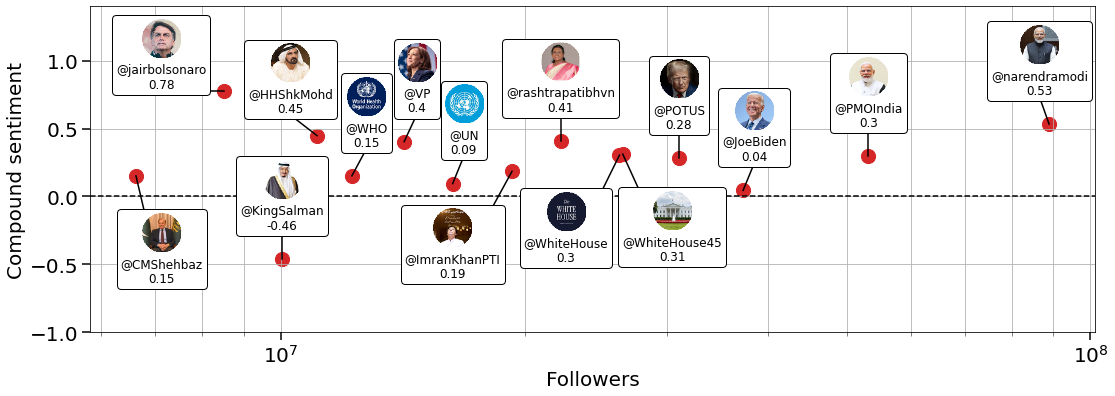

In [22]:
# Setup figure
fig, ax = plt.subplots(figsize=(18, 6))
topic = 'topic_covid_19'
top_users_for_topic = sentiment_of_most_followed_user[(sentiment_of_most_followed_user['topic'] == topic)
                                                      & (sentiment_of_most_followed_user['sentimentCompound'].notnull())
                                                     ].head(15)
#print(top_users_for_topic)
# Plot blue dots
ax.scatter(
    top_users_for_topic['followers'],
    top_users_for_topic['sentimentCompound'],
    color='tab:red',
    s=200,
    zorder=1
)

# Add image+text annotations with bounding box and connecting line
for idx, row in top_users_for_topic.iterrows():
    x, y = row['followers'], row['sentimentCompound']
    y_offset = 0.2  # space above the dot
    y_annot = y + y_offset

    img_path = './user-profiles-pics/' + row['matchingUserName'] + '.jpg'
    if pd.notna(img_path) and os.path.exists(img_path):
        circ_img_array = make_circle(img_path)
        imagebox = OffsetImage(circ_img_array, zoom=0.6)

        text = TextArea(
            f"@{row['matchingUserName']}\n{round(row['sentimentCompound'], 2)}",
            textprops=dict(fontsize=12, ha='center')
        )

        # Combine image and text vertically
        box = VPacker(children=[imagebox, text], align="center", pad=0, sep=5)

        if row['matchingUserName'] in ['WhiteHouse45']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 4000000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['ImranKhanPTI']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 3000000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['WhiteHouse']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 3700000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['CMShehbaz']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 500000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'jairbolsonaro']:
            x_offset = 1400000  # space above the dot
            x_annot = x - x_offset
            y_offset = 0  # space above the dot
            y_annot = y - y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'HHShkMohd']:
            x_offset = 800000  # space above the dot
            x_annot = x - x_offset
            y_offset = 0.15  # space above the dot
            y_annot = y + y_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'narendramodi']:
            x_offset = 2400000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'JoeBiden']:
            x_offset = 1200000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'UN', 'VP', 'WHO']:
            x_offset = 520000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        else:
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x, x], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
    else:
        print( row['matchingUserName'] )

# Axis and plot formatting
ax.set_xlabel('Followers', fontsize=20)
ax.set_ylabel('Compound sentiment', fontsize=20)
ax.set_ylim([-1, 1.4])  # extend to fit annotations
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_xscale('log')

plt.axhline(0, color='black', linestyle='dashed')
plt.xticks(fontsize=20, ha='center')
plt.yticks(fontsize=20, ha='right')
plt.grid(True)
#ax.set_title('Top 15 Most Followed Users on COVID-19', fontsize=20, pad=10)


# Minor ticks and labels on log-scale x-axis
minor_locator = LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100)
#minor_formatter = LogFormatter(labelOnlyBase=True)

ax.xaxis.set_minor_locator(minor_locator)
#ax.xaxis.set_minor_formatter(minor_formatter)
minor_formatter = LogFormatterSciNotation(labelOnlyBase=False)
# Format minor tick labels on the y-axis
ax.xaxis.set_minor_formatter(minor_formatter)

ax.xaxis.grid(True, which='minor')
# Optional: style the ticks
ax.tick_params(axis='x', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='x', which='major', length=8, width=1.5, labelsize=20)

ax.tick_params(axis='y', which='minor', length=4, width=1, color='gray', labelsize=18)
ax.tick_params(axis='y', which='major', length=8, width=1.5, labelsize=20)

ax.xaxis.grid(True, which='minor')

plt.savefig('./plots/followersvssentiments_covid_19.pdf', bbox_inches = 'tight')
plt.show()


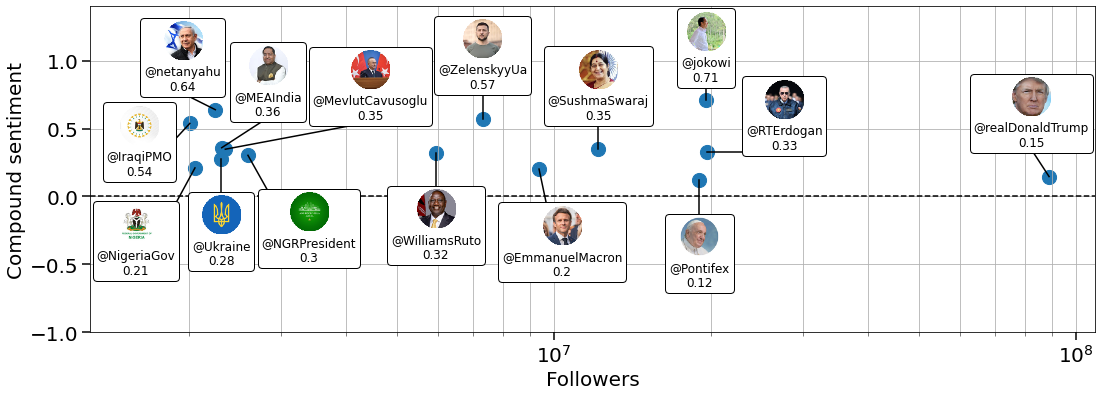

In [23]:

# Setup figure
fig, ax = plt.subplots(figsize=(18, 6))
topic = 'topic_energy_security'
top_users_for_topic = sentiment_of_most_followed_user[(sentiment_of_most_followed_user['topic'] == topic) 
                                                      & (sentiment_of_most_followed_user['sentimentCompound'].notnull())
                                                     ].head(15)

#print(top_users_for_topic)
# Plot blue dots
ax.scatter(
    top_users_for_topic['followers'],
    top_users_for_topic['sentimentCompound'],

    color='tab:blue',
    s=200,
    zorder=1,
    
)

# Add image+text annotations with bounding box and connecting line
for idx, row in top_users_for_topic.iterrows():
    x, y = row['followers'], row['sentimentCompound']
    y_offset = 0.2  # space above the dot
    y_annot = y + y_offset

    img_path = './user-profiles-pics/' + row['matchingUserName'] + '.jpg'
    if pd.notna(img_path) and os.path.exists(img_path):
        circ_img_array = make_circle(img_path)
        imagebox = OffsetImage(circ_img_array, zoom=0.6)

        text = TextArea(
            f"@{row['matchingUserName']}\n{round(row['sentimentCompound'], 2)}",
            textprops=dict(fontsize=12, ha='center')
        )

        # Combine image and text vertically
        box = VPacker(children=[imagebox, text], align="center", pad=0, sep=5)

        if row['matchingUserName'] in ['CMShehbaz']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 500000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['Pontifex', 'Ukraine', 'WilliamsRuto']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 0  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['EmmanuelMacron']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 1000000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['realDonaldTrump']:
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            x_offset = 6700000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['RTErdogan']:#, 'Ukraine', 'MEAIndia'
            y_offset = 0  # space above the dot
            y_annot = y - y_offset
            x_offset = 8000000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['IraqiPMO']:#, 'Ukraine', 'MEAIndia'
            y_offset = 0.4  # space above the dot
            y_annot = y - y_offset
            x_offset = 400000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['NGRPresident']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 800000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['NigeriaGov']:
            y_offset = 0.8  # space above the dot
            y_annot = y - y_offset
            x_offset = 470000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'MEAIndia' ]:
            y_offset = 0.22  # space above the dot
            y_annot = y + y_offset
            x_offset = 520000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['MevlutCavusoglu']:
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            x_offset = 2100000  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in ['jokowi']:
            y_offset = 0.12  # space above the dot
            y_annot = y + y_offset
            x_offset = 0  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        elif row['matchingUserName'] in [ 'netanyahu']:
            y_offset = 0.12  # space above the dot
            y_annot = y + y_offset
            x_offset = 300000  # space above the dot
            x_annot = x - x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
        else:
            y_offset = 0.2  # space above the dot
            y_annot = y + y_offset
            x_offset = 0  # space above the dot
            x_annot = x + x_offset
            # Create the annotation box with a visible frame
            ab = AnnotationBbox(
                box,
                (x_annot, y_annot),
                frameon=True,
                box_alignment=(0.5, 0),  # center-aligned
                bboxprops=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4'),
                zorder=3
            )
            ax.add_artist(ab)

            # Draw line from dot to center of bounding box
            ax.plot([x,  x_annot], [y, y_annot], color='black', linewidth=1.5, linestyle='-')
    else:
        print( row['matchingUserName'] )

# Axis and plot formatting
ax.set_xlabel('Followers', fontsize=20)
ax.set_ylabel('Compound sentiment', fontsize=20)
ax.set_ylim([-1, 1.4])  # extend to fit annotations
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_xscale('log')

plt.axhline(0, color='black', linestyle='dashed')
plt.xticks(fontsize=20, ha='center')
plt.yticks(fontsize=20, ha='right')
plt.grid(True)
#ax.set_title('Top 15 Most Followed Users on Energy Security', fontsize=20, pad=10)

# Minor ticks and labels on log-scale x-axis
minor_locator = LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100)
#minor_formatter = LogFormatter(labelOnlyBase=True)

ax.xaxis.set_minor_locator(minor_locator)
#ax.xaxis.set_minor_formatter(minor_formatter)
minor_formatter = LogFormatterSciNotation(labelOnlyBase=False)
# Format minor tick labels on the y-axis
ax.xaxis.set_minor_formatter(minor_formatter)

ax.xaxis.grid(True, which='minor')
# Optional: style the ticks
ax.tick_params(axis='x', which='minor', length=4, width=1, color='gray', labelsize=20)
ax.tick_params(axis='x', which='major', length=8, width=1.5, labelsize=20)

ax.tick_params(axis='y', which='minor', length=4, width=1, color='gray', labelsize=20)
ax.tick_params(axis='y', which='major', length=8, width=1.5, labelsize=20)

ax.xaxis.grid(True, which='minor')

plt.savefig('./plots/followersvssentiments_energy_security.pdf', bbox_inches = 'tight')
plt.show()